**APPENDIX B**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('Aotizhongxin.csv')
df

,date,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1/3/2013 0:00,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,1/3/2013 1:00,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,1/3/2013 2:00,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,1/3/2013 3:00,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,1/3/2013 4:00,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,28/2/2017 19:00,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
35060,28/2/2017 20:00,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
35061,28/2/2017 21:00,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
35062,28/2/2017 22:00,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin


In [ ]:
df.isna().sum()

date        0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd         81
WSPM        0
station     0
dtype: int64

In [ ]:
df.describe(include='all')

,date,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34983,35064.000000,35064
unique,35064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,10/2/2015 8:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5140,NaN,35064
mean,NaN,82.668987,109.837240,17.409841,59.400561,1269.468391,56.058185,13.584533,1011.848730,3.124302,0.067383,NaN,1.708247,NaN
std,NaN,81.751480,94.762669,22.691094,36.973225,1226.653885,57.208026,11.397607,10.403243,13.688057,0.909798,NaN,1.203954,NaN
min,NaN,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,NaN,0.000000,NaN
25%,NaN,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,NaN,0.900000,NaN
50%,NaN,59.000000,86.000000,9.000000,54.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,NaN,1.400000,NaN
75%,NaN,114.000000,154.000000,21.000000,82.000000,1600.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,NaN,2.200000,NaN


In [ ]:
print(df.agg({'PM2.5': ['min', 'mean', 'max', 'median', 'skew'],
             'PM10': ['min', 'max', 'median', 'mean', 'skew'],
              'SO2': ['min', 'max', 'median', 'mean', 'skew'],
              'NO2': ['min', 'max', 'median', 'mean', 'skew'],
              'CO': ['min', 'max', 'median', 'mean', 'skew'],
              'O3': ['min', 'max', 'median', 'mean', 'skew']}))


             PM2.5        PM10  ...            CO          O3
max     898.000000  984.000000  ...  10000.000000  423.000000
mean     82.668987  109.837240  ...   1269.468391   56.058185
median   59.000000   86.000000  ...    900.000000   42.000000
min       3.000000    2.000000  ...    100.000000    0.214200
skew      1.975152    1.785503  ...      2.594066    1.451004

[5 rows x 6 columns]


In [ ]:
import datetime

df['time'] = df.apply(lambda x : datetime.datetime(year=x['year'], month=x['month'], day=x['day'], hour=x['hour']), axis=1)
df.drop(columns=['year', 'month', 'day', 'hour', 'No'], inplace=True)
df = df.set_index('time')
df.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
time,,,,,,,,,,,,,
2013-03-01 00:00:00,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
2013-03-01 01:00:00,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2013-03-01 02:00:00,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
2013-03-01 03:00:00,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
2013-03-01 04:00:00,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [ ]:
df.index

DatetimeIndex(['2013-03-01 00:00:00', '2013-03-01 01:00:00',
               '2013-03-01 02:00:00', '2013-03-01 03:00:00',
               '2013-03-01 04:00:00', '2013-03-01 05:00:00',
               '2013-03-01 06:00:00', '2013-03-01 07:00:00',
               '2013-03-01 08:00:00', '2013-03-01 09:00:00',
               ...
               '2017-02-28 14:00:00', '2017-02-28 15:00:00',
               '2017-02-28 16:00:00', '2017-02-28 17:00:00',
               '2017-02-28 18:00:00', '2017-02-28 19:00:00',
               '2017-02-28 20:00:00', '2017-02-28 21:00:00',
               '2017-02-28 22:00:00', '2017-02-28 23:00:00'],
              dtype='datetime64[ns]', name='time', length=35064, freq=None)

In [ ]:
date = pd.DataFrame(df.index)
date.to_csv('b2.csv',header=['date'],index=False)

In [ ]:
df['wd'].unique()

KeyError: ignored

In [ ]:
df = df.join(pd.get_dummies(df['wd'])) # one-hot encoding
del df['wd']
df.head()

,date,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,station,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,1/3/2013 0:00,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,4.4,Aotizhongxin,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1/3/2013 1:00,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,4.7,Aotizhongxin,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1/3/2013 2:00,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,5.6,Aotizhongxin,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1/3/2013 3:00,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,3.1,Aotizhongxin,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1/3/2013 4:00,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,2.0,Aotizhongxin,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


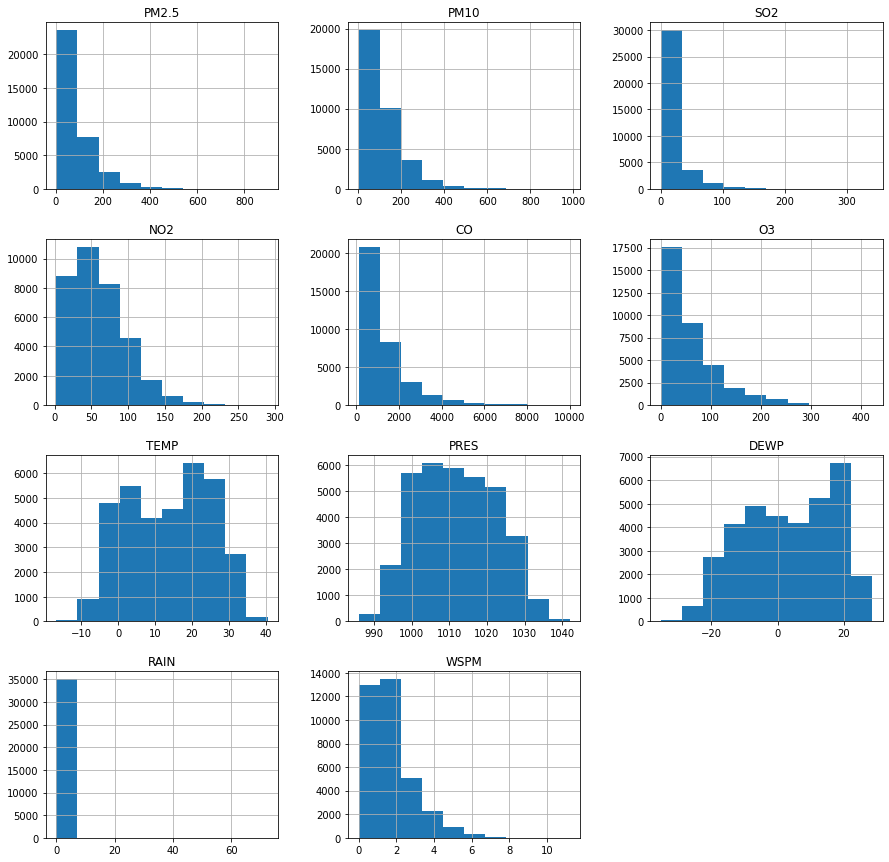

In [ ]:
df_hist = df.drop(columns=['date'],axis=1)
df_hist.hist(figsize=(15,15));

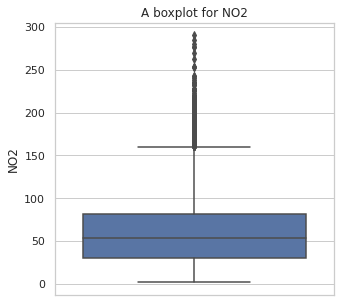

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="whitegrid")
plt.figure(figsize=(5,5))
plt.title('A boxplot for NO2')
ax = sns.boxplot( y = 'NO2', data=df, orient="v")



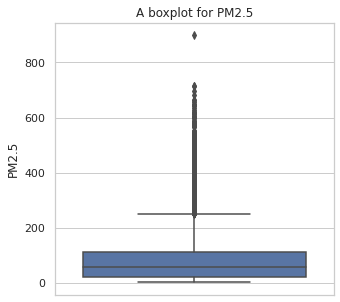

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="whitegrid")
plt.figure(figsize=(5,5))
plt.title('A boxplot for PM2.5')
ax = sns.boxplot( y = 'PM2.5', data=df, orient="v")

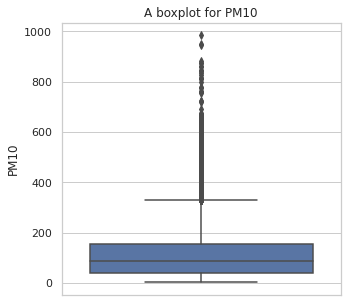

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="whitegrid")
plt.figure(figsize=(5,5))
plt.title('A boxplot for PM10')
ax = sns.boxplot( y = 'PM10', data=df, orient="v")

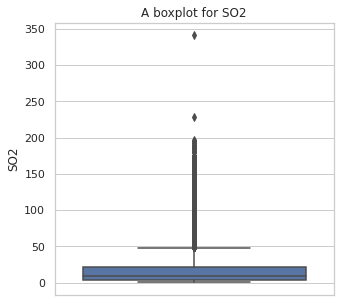

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="whitegrid")
plt.figure(figsize=(5,5))
plt.title('A boxplot for SO2')
ax = sns.boxplot( y = 'SO2', data=df, orient="v")

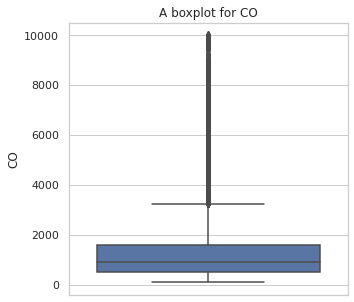

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="whitegrid")
plt.figure(figsize=(5,5))
plt.title('A boxplot for CO')
ax = sns.boxplot( y = 'CO', data=df, orient="v")

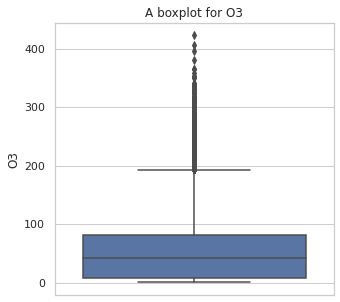

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="whitegrid")
plt.figure(figsize=(5,5))
plt.title('A boxplot for O3')
ax = sns.boxplot( y = 'O3', data=df, orient="v")

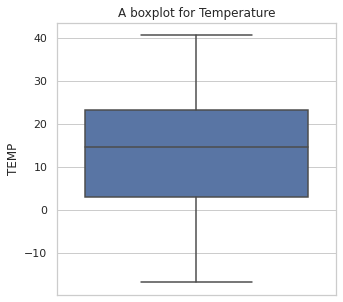

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="whitegrid")
plt.figure(figsize=(5,5))
plt.title('A boxplot for Temperature')
ax = sns.boxplot( y = 'TEMP', data=df, orient="v")

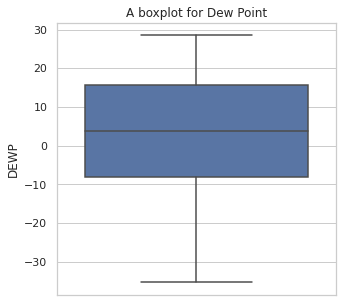

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="whitegrid")
plt.figure(figsize=(5,5))
plt.title('A boxplot for Dew Point')
ax = sns.boxplot( y = 'DEWP', data=df, orient="v")

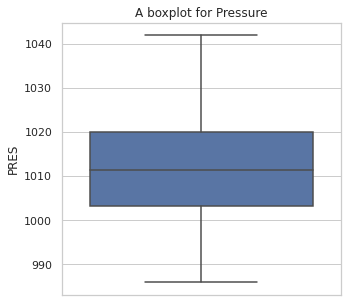

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="whitegrid")
plt.figure(figsize=(5,5))
plt.title('A boxplot for Pressure')
ax = sns.boxplot( y = 'PRES', data=df, orient="v")

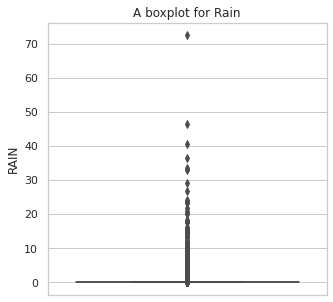

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="whitegrid")
plt.figure(figsize=(5,5))
plt.title('A boxplot for Rain')
ax = sns.boxplot( y = 'RAIN', data=df, orient="v")

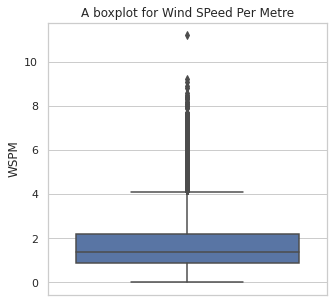

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="whitegrid")
plt.figure(figsize=(5,5))
plt.title('A boxplot for Wind SPeed Per Metre')
ax = sns.boxplot( y = 'WSPM', data=df, orient="v")